## Prelab Stuff

In [1]:
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import stats
from scipy.stats import poisson as pois
from scipy.stats import norm

In [2]:
# Gets data, assumes data is in data folder placed one level up
# Signal:
higgs = pd.read_pickle(r"../data/higgs_100000_pt_1000_1200.pkl")
# Background:
qcd = pd.read_pickle(r"../data/qcd_100000_pt_1000_1200.pkl")
print("Array of column names for higgs are " + str(higgs.keys()))
print("Array of column names for qcd are " + str(qcd.keys()))

Array of column names for higgs are Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
Array of column names for qcd are Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


In [3]:
# Get normalized pt values, since in range 1000 to 1200
# Not sure if necessary
higgs_norm_pt = (higgs["pt"]-1100)/100
qcd_norm_pt = (qcd["pt"]-1100)/100
five_sigma = norm.cdf(5)*2-1

## Problem 1
#### Make a stacked histogram plot for the feature variable: mass

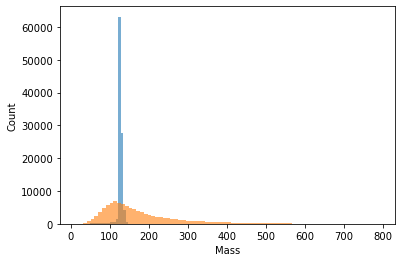

In [4]:
plt.hist(higgs["mass"],bins=20,alpha=0.6)
plt.hist(qcd["mass"],bins=80,alpha=0.6)
plt.xlabel("Mass")
plt.ylabel("Count")
plt.show()

## Problem 2
#### Identify mass cuts to optimize the expected significance

In [5]:
def cut(n_min, n_max, feature, df):
    return df.loc[(df[feature] <= n_max) & (df[feature] >= n_min)]

# - Significance as defined by N(higgs) / sqrt(N(qcd)) where each is defined by the ratio of data points
# found in the cut multiplied by the expected yield
# - Meant to be used with cut higgs and qcd dataframes
def significance(higgs, qcd, data_higgs=100000, data_qcd=100000, total_higgs = 50, total_qcd = 2000):
    return np.shape(higgs)[0]/data_higgs*total_higgs / ((np.shape(qcd)[0]/data_qcd*total_qcd)**0.5)

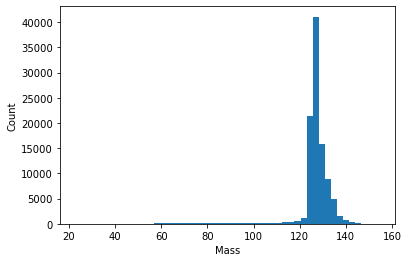

In [6]:
plt.hist(higgs["mass"],bins=50)
plt.xlabel("Mass")
plt.ylabel("Count")
plt.show()

In [7]:
def cut_sig_print(v1,v2,feat):
    sig = significance(cut(v1,v2,feat,higgs),cut(v1,v2,feat,qcd))
    print("Expected significance of "+feat+" cuts of "+str(v1)+" to "+str(v2)+" is "+str(sig))
cut_sig_print(120,130,"mass")
cut_sig_print(110,130,"mass")
cut_sig_print(120,140,"mass")
cut_sig_print(118,130,"mass")
cut_sig_print(119,130,"mass")
cut_sig_print(121,130,"mass")
cut_sig_print(123,130,"mass")
cut_sig_print(123,127,"mass")
cut_sig_print(123,129,"mass")
cut_sig_print(124,130,"mass")
cut_sig_print(125,130,"mass")
cut_sig_print(125,129,"mass")
cut_sig_print(125,128,"mass")
cut_sig_print(126,129,"mass")
print("\nThe following is the mass cut which resulted in the highest significance:")
cut_sig_print(125,129,"mass")

Expected significance of mass cuts of 120 to 130 is 3.3475406344693024
Expected significance of mass cuts of 110 to 130 is 2.358769058285504
Expected significance of mass cuts of 120 to 140 is 3.009284136100454
Expected significance of mass cuts of 118 to 130 is 3.0604709786936377
Expected significance of mass cuts of 119 to 130 is 3.2014025368428265
Expected significance of mass cuts of 121 to 130 is 3.514016524481035
Expected significance of mass cuts of 123 to 130 is 3.943137907471722
Expected significance of mass cuts of 123 to 127 is 3.3216564279060092
Expected significance of mass cuts of 123 to 129 is 3.926243676981313
Expected significance of mass cuts of 124 to 130 is 4.225651989421637
Expected significance of mass cuts of 125 to 130 is 4.2380247446446635
Expected significance of mass cuts of 125 to 129 is 4.335413255481377
Expected significance of mass cuts of 125 to 128 is 4.309593002606477
Expected significance of mass cuts of 126 to 129 is 3.2350056749062306

The following

## Problem 3
#### Make two sets of stacked histogram plots for the rest of the features
#### Set A without any event selection

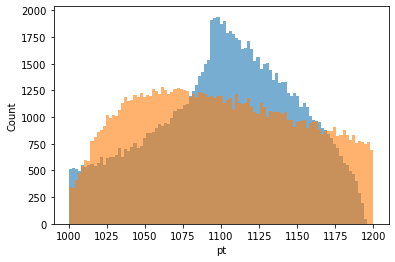

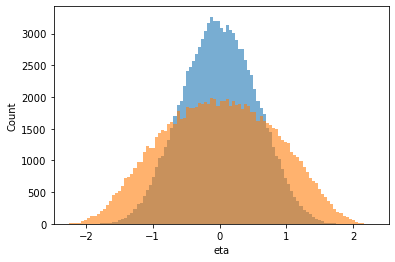

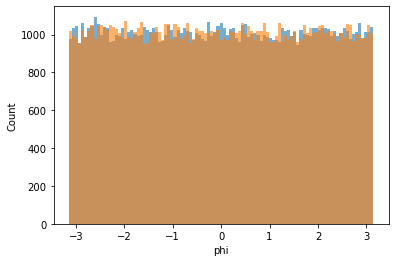

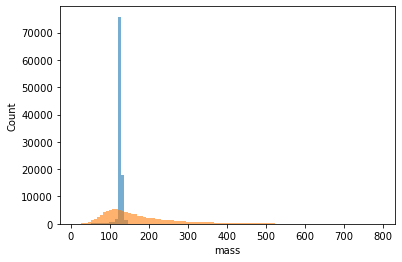

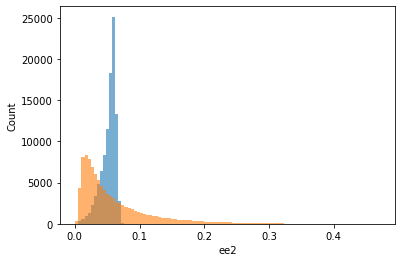

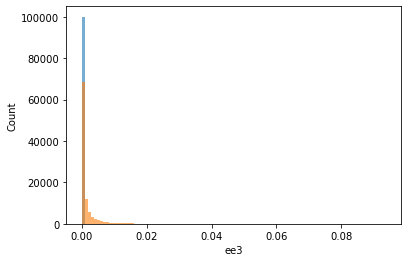

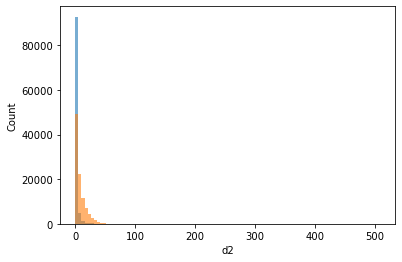

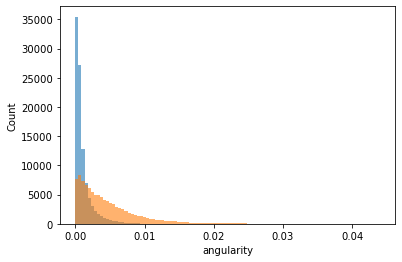

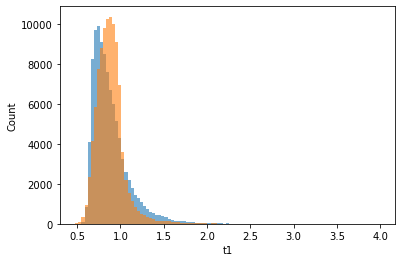

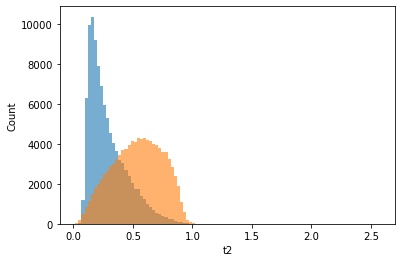

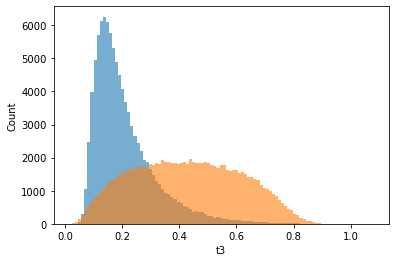

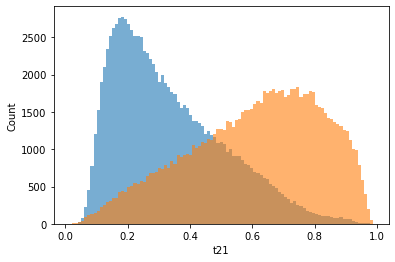

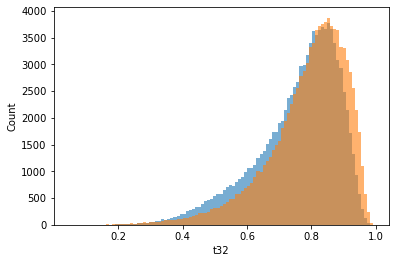

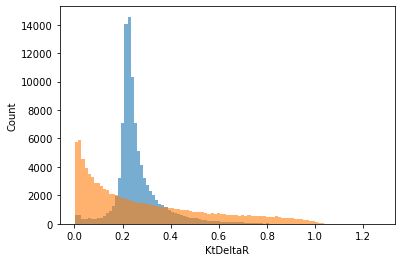

In [8]:
labels = higgs.keys()

def plot_histogram(higgs, qcd, feat):
    bins = np.linspace(min(higgs[feat].append(qcd[feat])), max(higgs[feat].append(qcd[feat])), 100)
    plt.hist(higgs[feat],bins=bins,alpha=0.6)
    plt.hist(qcd[feat],bins=bins,alpha=0.6)
    plt.xlabel(feat)
    plt.ylabel("Count")
    plt.show()
for i in labels:
    plot_histogram(higgs, qcd, i)

In [9]:
# Searching for another feature as discriminative as mass
cut_sig_print(0.02,0.3,"t2")
cut_sig_print(0.05,0.25,"t2")
cut_sig_print(0.05,0.23,"t2")
cut_sig_print(0.08,0.25,"t2")
cut_sig_print(0.1,0.25,"t2")

cut_sig_print(0.2,0.3,"KtDeltaR")
cut_sig_print(0.2,0.29,"KtDeltaR")
cut_sig_print(0.21,0.29,"KtDeltaR")

cut_sig_print(0.05,0.075,"ee2")
cut_sig_print(0.06,0.075,"ee2")
cut_sig_print(0.04,0.075,"ee2")
cut_sig_print(0.045,0.075,"ee2")
cut_sig_print(0.04,0.068,"ee2")
cut_sig_print(0.04,0.067,"ee2")


Expected significance of t2 cuts of 0.02 to 0.3 is 1.8051011440582028
Expected significance of t2 cuts of 0.05 to 0.25 is 1.8243439260744074
Expected significance of t2 cuts of 0.05 to 0.23 is 1.8093711460509798
Expected significance of t2 cuts of 0.08 to 0.25 is 1.8467941926367
Expected significance of t2 cuts of 0.1 to 0.25 is 1.8173938340485423
Expected significance of KtDeltaR cuts of 0.2 to 0.3 is 2.0415143153863005
Expected significance of KtDeltaR cuts of 0.2 to 0.29 is 2.0616581615966307
Expected significance of KtDeltaR cuts of 0.21 to 0.29 is 1.9584806252887088
Expected significance of ee2 cuts of 0.05 to 0.075 is 1.9276350097449464
Expected significance of ee2 cuts of 0.06 to 0.075 is 1.1256497702365302
Expected significance of ee2 cuts of 0.04 to 0.075 is 1.92471751645039
Expected significance of ee2 cuts of 0.045 to 0.075 is 1.9580022086021043
Expected significance of ee2 cuts of 0.04 to 0.068 is 2.036109837015279
Expected significance of ee2 cuts of 0.04 to 0.067 is 2.032

No feature is as discriminative as mass that I can find.

#### Set B with your optimal mass cuts

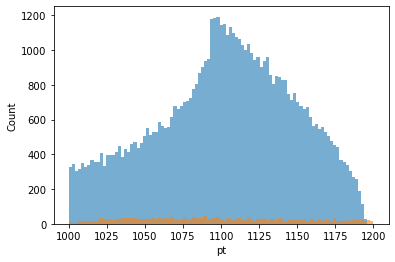

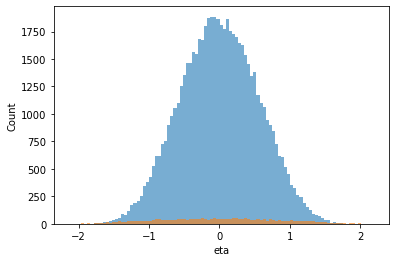

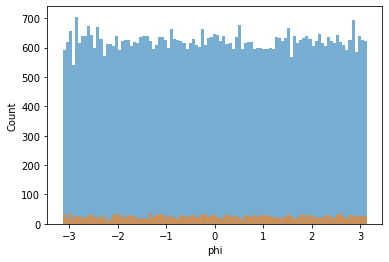

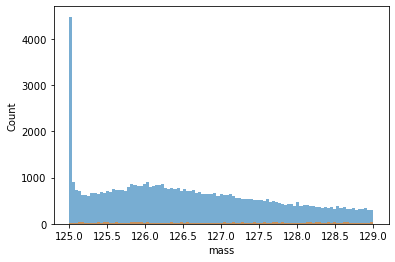

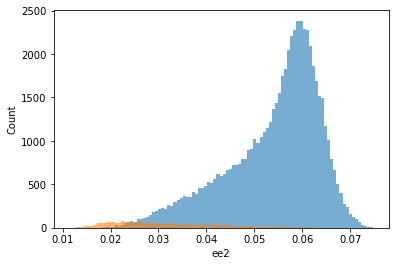

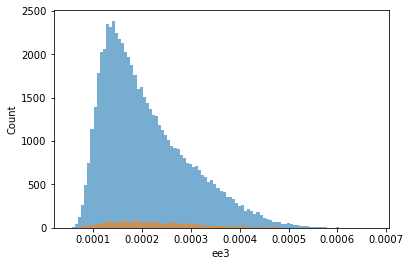

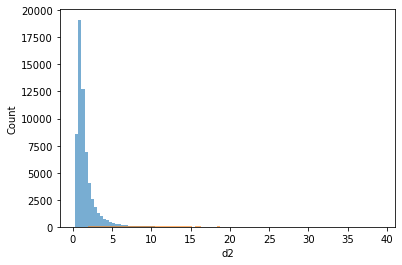

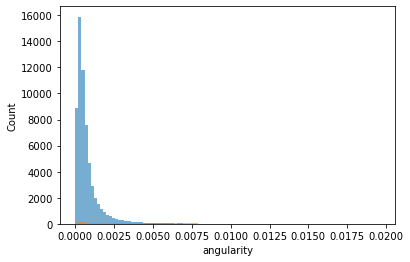

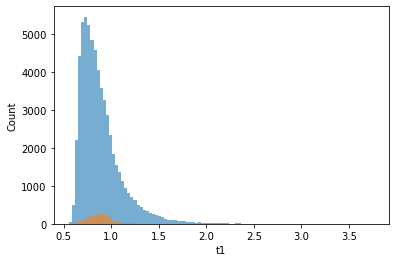

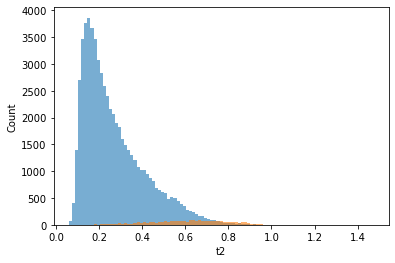

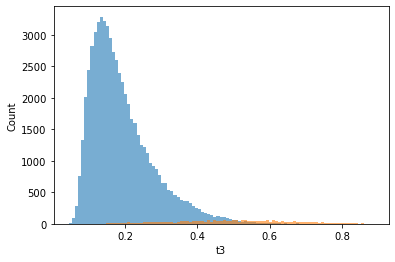

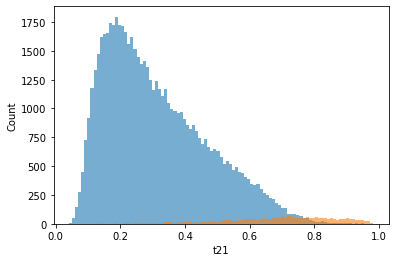

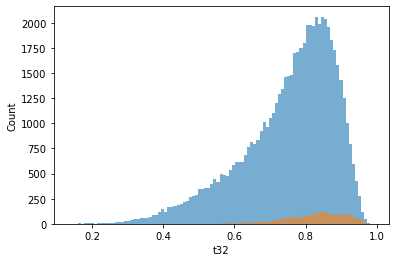

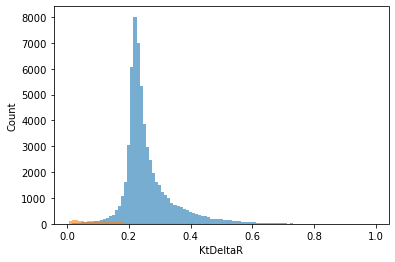





Graphs with qcd layered onto itself multiple times to allow visual comparison






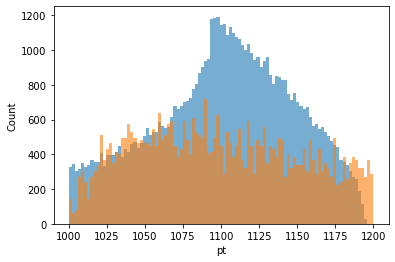

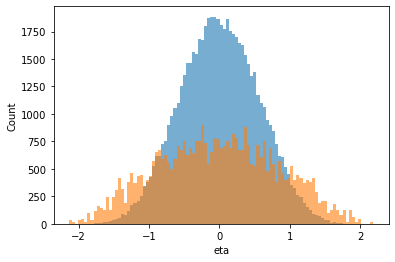

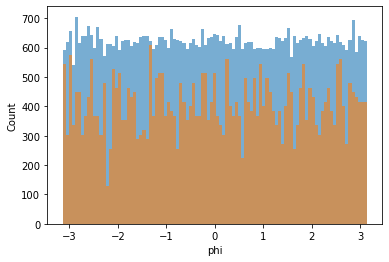

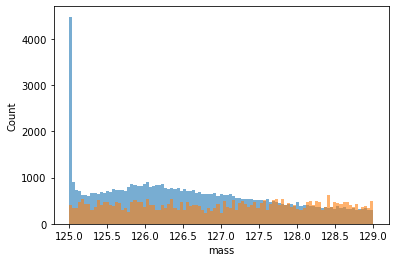

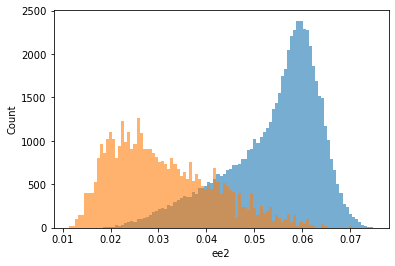

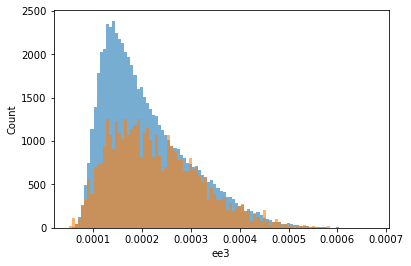

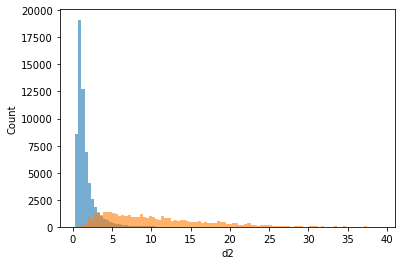

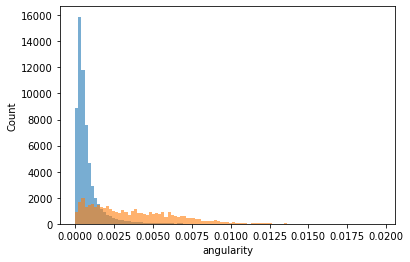

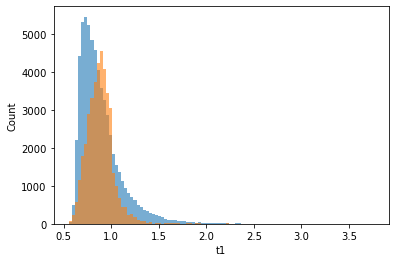

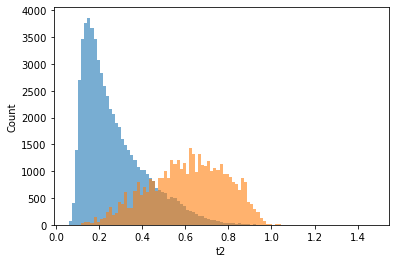

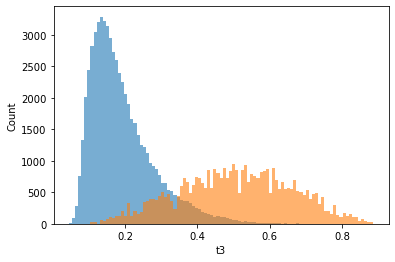

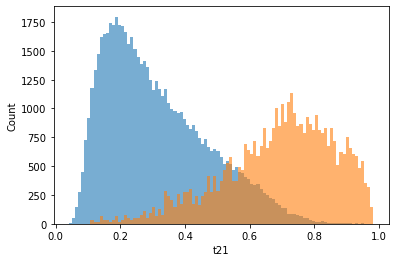

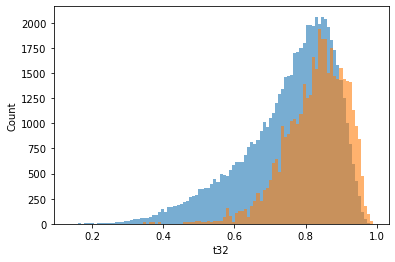

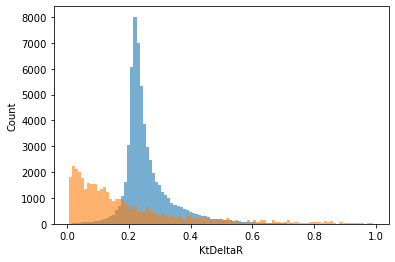

In [10]:
higgs_mass_cut = cut(125,129,"mass",higgs)
qcd_mass_cut = cut(125,129,"mass",qcd)
for i in labels:
    plot_histogram(higgs_mass_cut, qcd_mass_cut, i)
print("\n\n\n\nGraphs with qcd layered onto itself multiple times to allow visual comparison\n\n\n\n")
qcd_mass_cut_layered = qcd_mass_cut.copy()
for i in range(1,16):
    qcd_mass_cut_layered = qcd_mass_cut_layered.append(qcd_mass_cut)
for i in labels:
    plot_histogram(higgs_mass_cut, qcd_mass_cut_layered, i)

In [30]:
def cut_sig_print_after_first_cut(v1,v2,feat):
    sig = significance(cut(v1,v2,feat,higgs_mass_cut),cut(v1,v2,feat,qcd_mass_cut))
    print("Expected significance of "+feat+" cuts of "+str(v1)+" to "+str(v2)+" is "+str(sig))
    
cut_sig_print_after_first_cut(0.05,0.07,"ee2")
cut_sig_print_after_first_cut(0.055,0.07,"ee2")
print("\nSignificant ee2 cut of 0.055 to 0.07\n\n")

cut_sig_print_after_first_cut(0,4,"d2")
cut_sig_print_after_first_cut(0,3.5,"d2")
cut_sig_print_after_first_cut(0,4.5,"d2")
cut_sig_print_after_first_cut(0,3.0,"d2")
cut_sig_print_after_first_cut(0,2.5,"d2")
cut_sig_print_after_first_cut(0,2,"d2")
cut_sig_print_after_first_cut(0,1.5,"d2")
cut_sig_print_after_first_cut(0,1,"d2")
cut_sig_print_after_first_cut(0,1,"d2")
cut_sig_print_after_first_cut(0.3,1,"d2")
print("d2 cut from 0 to 0.8 results in an error due to not finding any qcd data after the mass cut")
print("Possibly change cut to 0 to 2 to try to avoid overfitting too much")
print("\nSignificant d2 cut of 0 to 2")

Expected significance of ee2 cuts of 0.05 to 0.07 is 12.670688695308666
Expected significance of ee2 cuts of 0.055 to 0.07 is 15.643218879956565

Significant ee2 cut of 0.055 to 0.07


Expected significance of d2 cuts of 0 to 4 is 10.547251666502296
Expected significance of d2 cuts of 0 to 3.5 is 11.856403158718456
Expected significance of d2 cuts of 0 to 4.5 is 9.460099803685365
Expected significance of d2 cuts of 0 to 3.0 is 14.539448614123826
Expected significance of d2 cuts of 0 to 2.5 is 18.718884264960877
Expected significance of d2 cuts of 0 to 2 is 24.14524290925769
Expected significance of d2 cuts of 0 to 1.5 is 34.923114385494785
Expected significance of d2 cuts of 0 to 1 is 47.96713288805158
Expected significance of d2 cuts of 0 to 1 is 47.96713288805158
Expected significance of d2 cuts of 0.3 to 1 is 47.96713288805158
d2 cut from 0 to 0.8 results in an error due to not finding any qcd data after the mass cut
Possibly change cut to 0 to 2 to try to avoid overfitting too much

## Problem 4
#### Optimize event selections using multiple features (if necessary)

In [29]:
higgs_mass_ee2_cut = cut(0.055,0.07,"ee2",higgs_mass_cut)
qcd_mass_ee2_cut = cut(0.055,0.07,"ee2",qcd_mass_cut)
print("Original significance of "+str(significance(higgs,qcd)))
print("Significance after mass and ee2 cuts of "+str(significance(higgs_mass_ee2_cut,qcd_mass_ee2_cut)))
higgs_mass_ee2_d2_cut = cut(0,2,"d2",higgs_mass_ee2_cut)
qcd_mass_ee2_d2_cut = cut(0,2,"d2",qcd_mass_ee2_cut)
print("Significance after additional d2 cut of "+str(significance(higgs_mass_ee2_d2_cut,qcd_mass_ee2_d2_cut)))

Original significance of 1.118033988749895
Significance after mass and ee2 cuts of 15.643218879956565
Significance after additional d2 cut of 19.985783914586776


The additional d2 cut makes a difference so it is likely worth including in final model. All in all the cuts improved the significance drastically and may help isolate signals in the other dataset.

In [ ]:
# Ignore for now
print("Five sigma significance for qcd is: " + str(pois.ppf(five_sigma,np.mean(qcd["mass"]))))
print("Qcd mean is: " + str(np.mean(qcd["mass"])))

print("Five sigma significance for higgs is: " + str(pois.ppf(five_sigma,np.mean(higgs["mass"]))))
print("Qcd mean is: " + str(np.mean(higgs["mass"])))